#Import Library
Proses untuk menginisialisasi library yang akan dibutuhkan untuk proses mengolah data untuk Predictive Analysis

Mengimpor library google drive untuk mengambil dataset yang disimpan dalam Google Drive

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengimpor library yang dibutuhkan untuk proses predictive analysis

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#Data Loading
Tahap untuk memuat dataset ke dalam variabel dalam python

Menuliskan url atau direktori dari tempat dataset disimpan

In [77]:
url = "/content/drive/MyDrive/File Ozan/Repo Machine Learning/vgsales.csv"

Memanggil dataset berformat .csv ke dalam variabel dataset menggunakan library pandas

In [78]:
dataset_init = pd.read_csv(url)
dataset_init

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#Data Preparation
Tahap untuk mengolah data agar data siap digunakan untuk proses modeling. Tahapan yang dilakukan antara lain
- `Data Info`: Tahap untuk memuat informasi dari dataset
- `Check Missing Value` : Melakukan pengecekan missing value dalam data (bisa NULL atau 0) menyesuaikan analisis masalah
- `Imputation Missing Value` : Solusi untuk mengganti suatu missing value dengan suatu nilai pengganti yang didapatkan dari teknik khusus tertentu
- `Outlier Analysis` : Tahap untuk melakukan analisis & memvisualisasikan persebaran data pada setiap kolom untuk mengetahui outlier = sebuah data atau observasi yang menyimpang secara ekstrim dari rata-rata sekumpulan data yang ada
- `Drop Outlier` : Tahap untuk menangani outlier pada dataset. Disini digunakan metode Inter Quartile Range (IQR)
- `Univariate Analysis` : Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 1 jenis variabel / kolom
- `Multivariate Analysis` : Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 2 atau lebih jenis variabel / kolom
- `Drop Column` : Tahap untuk melakukan penghilangan kolom yang tidak diperlukan sesuai analisis masalah dan tujuan penelitian
- `Encoding Categorical Features` : Tahap untuk memberikan alias dalam bentuk numerik kepada kolom yang bersifat kategorikal
- `Train Test Split` : Tahap untuk membagi dataset menjadi data train dan data test dalam pembagian yang ditentukan
- `Standarisasi` : Tahap untuk melakukan perubahan skala nilai pada suatu kolom sesuai skala yang diinginkan


In [79]:
dataset = dataset_init

###Data Info
Tahap untuk memuat informasi dari dataset

Melihat informasi mengenai dataset antara lain
- Jumlah dan nama kolom
- Jumlah baris dari setiap kolom
- Tipe nullable atau tidak dari tiap kolom
- Tipe data dari tiap kolom

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


`dataset.describe()` Ditujukan untuk mendeskripsikan beberapa parameter untuk seluruh kolom dari dataset. Parameter tersebut antara lain
- Count atau jumlah baris dari setiap kolom
- Mean atau rata-rata dari setiap kolom
- Standar deviasi dari setiap kolom
- Nilai minimum / terkecil dari setiap kolom
- Nilai kuartil pertama atau 25% dari setiap kolom
- Nilai kuartil kedua atau 50% atau median dari setiap kolom
- Nilai kuartil ketiga atau 75% dari setiap kolom
- Nilai maximum / terbesar dari setiap kolom

In [81]:
dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


`dataset.columns` Ditujukan untuk mejabarkan kolom apa saja yang tersedia pada dataset yang digunakan

In [82]:
dataset.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

###Check Missing Value
Melakukan pengecekan missing value dalam data (bisa NULL atau 0) menyesuaikan analisis masalah.

Hasil:
- didapatkan missing value pada kolom `Year` yang bersifat numerik
- didapatkan missing value pada kolom `Publisher` yang bersifat kategorik

Tahap untuk melakukan pengecekan NULL pada setiap kolom, didapatkan hasil tidak ada NULL pada setiap kolom

In [83]:
# dataset.isnull().sum()*100/dataset.shape[0]
dataset.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

###Imputation Missing Value
Solusi untuk mengganti suatu missing value dengan suatu nilai pengganti yang didapatkan dari teknik khusus tertentu.

Hasil: Pada tahap ini digunakan
- teknik imputasi berdasarkan nilai rata-rata (mean) untuk kolom `Year`
- teknik imputasi berdasarkan nilai terbanyak (most frequent) untuk kolom `Publisher`

In [84]:
from sklearn.impute import SimpleImputer
numeric_transformer = SimpleImputer(strategy='mean')  # Use mean for numerical features
categorical_transformer = SimpleImputer(strategy='most_frequent')  # Use mode for categorical features

dataset['Year'] = numeric_transformer.fit_transform(dataset[['Year']])
dataset['Publisher'] = categorical_transformer.fit_transform(dataset[['Publisher']])

# Cek ukuran data untuk memastikan baris sudah di-drop
dataset.shape

(16598, 11)

In [85]:
dataset.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

###Outlier Analysis
Tahap untuk melakukan analisis & memvisualisasikan persebaran data pada setiap kolom untuk mengetahui outlier = sebuah data atau observasi yang menyimpang secara ekstrim dari rata-rata sekumpulan data yang ada

Hasil: Didapatkan outlier pada kolom `Year`, `NA_Sales`, `EU_Sales`, `JP_Sales`, dan `Other_Sales`

Tahap untuk melakukan analisis & memvisualisasikan persebaran data pada setiap kolom. Pada baris kode ini dilakukan penghilangan kolom yang bersifat kategorial yaitu `Name`, `Genre`, `Publisher`, dan `Platform`

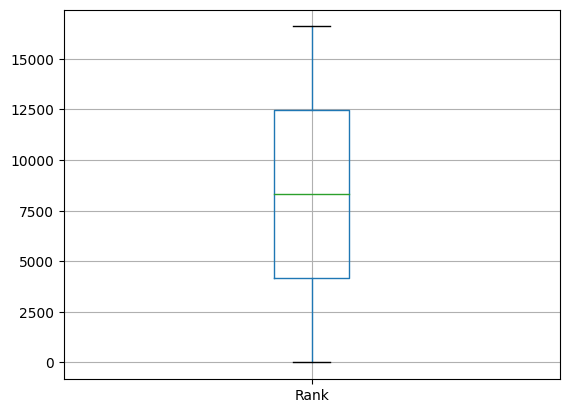

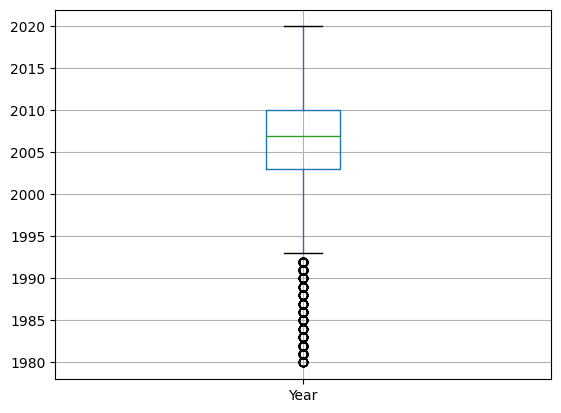

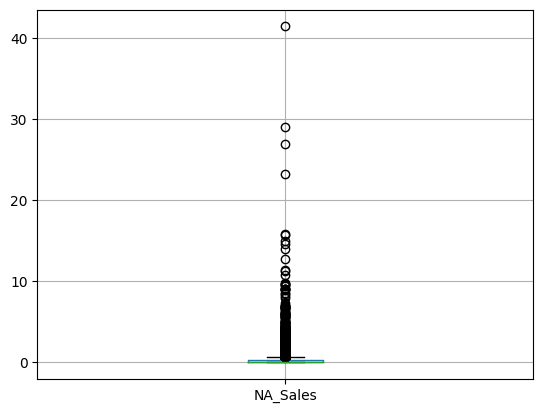

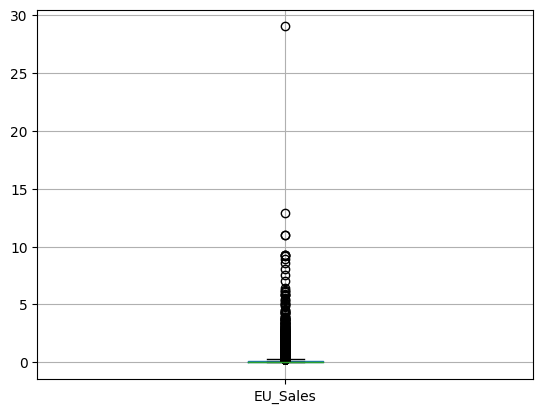

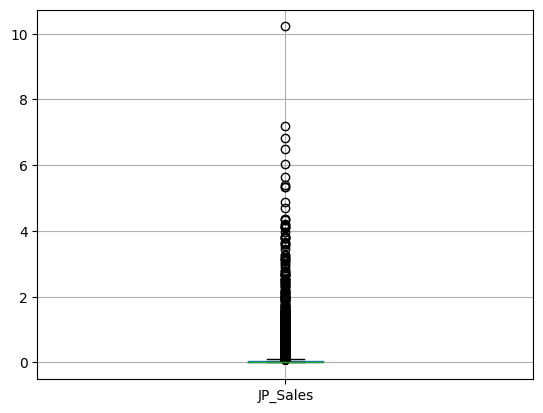

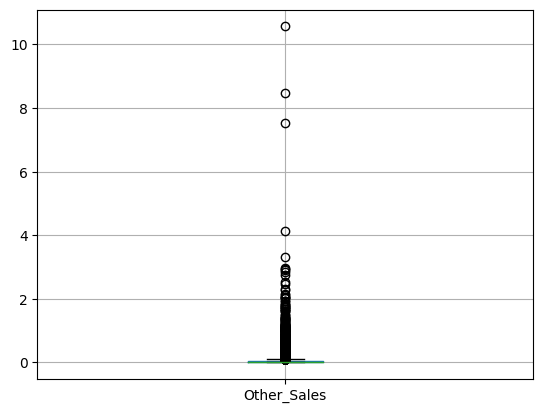

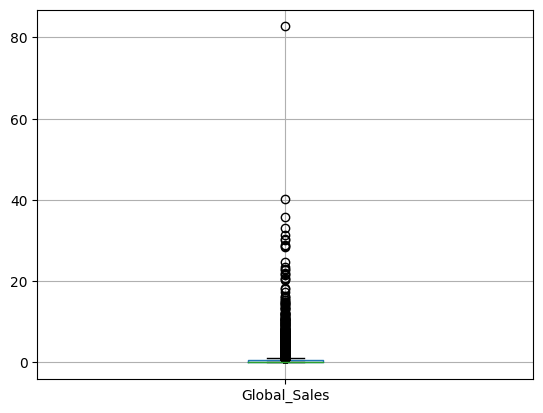

In [86]:
# num_dataset = dataset
num_dataset = dataset.drop(columns=['Name', 'Genre', 'Publisher', 'Platform'])
num_dataset

for column in num_dataset:
    plt.figure()
    num_dataset.boxplot([column])

Tahap yang sama dengan sebelumnya, yaitu untuk melakukan analisis & memvisualisasikan persebaran data pada setiap kolom. Hanya saja menggunakan visualisasi yang berbeda

######Check Outlier With Z-Score

Tahap untuk melakukan analisis & meggambarkan persebaran data pada setiap kolom menggunakan metode Z-Score

In [87]:
#Check with z-score
import scipy.stats as stats
stats.zscore(num_dataset)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,-1.732076,-0.070306,50.480508,57.136930,11.938058,44.606085,52.864025
1,-1.731867,-3.702882,35.284437,6.794188,21.767296,3.828224,25.532503
2,-1.731659,0.275653,19.084273,25.197785,12.002724,17.297115,22.690025
3,-1.731450,0.448633,18.961823,21.497277,10.353740,15.441165,20.876498
4,-1.731241,-1.800104,13.476053,17.302048,32.792857,5.047848,19.828254
...,...,...,...,...,...,...,...
16593,1.731197,-0.762226,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194
16594,1.731406,-0.589246,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194
16595,1.731615,0.275653,-0.324086,-0.290207,-0.251492,-0.254864,-0.339194
16596,1.731823,0.621613,-0.324086,-0.270418,-0.251492,-0.254864,-0.339194


###Drop Outliers
Tahap untuk menangani outlier pada dataset. Disini digunakan metode Inter Quartile Range (IQR).

Tahap untuk menangani outlier pada dataset. Disini digunakan metode Inter Quartile Range (IQR). Didapatkan data hasil drop yaitu 7677 baris dan 12 kolom

In [88]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR=Q3-Q1
dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
dataset.shape

<ipython-input-88-2ae10133999e>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
<ipython-input-88-2ae10133999e>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)
<ipython-input-88-2ae10133999e>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]


(11926, 11)

###Univariate Analysis
Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 1 jenis variabel / kolom

Pada tahap baris kode ini ditujukan untuk membagi kolom numerik dan kategorikal ke dalam masing-masing variabel

In [89]:
numerical_features = ['Rank', 'Year', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
categorical_features = ['Name', 'Genre', 'Publisher', 'Platform']

######Categorical Features

Pada tahap baris kode ini ditujukan mendeskripsikan jumlah sampel dan persentase kolom kategorik dari `Genre`

              jumlah sampel  persentase
Action                 2409        20.2
Sports                 1620        13.6
Misc                   1336        11.2
Adventure              1120         9.4
Racing                  936         7.8
Shooter                 909         7.6
Role-Playing            863         7.2
Simulation              648         5.4
Platform                591         5.0
Fighting                541         4.5
Strategy                505         4.2
Puzzle                  448         3.8


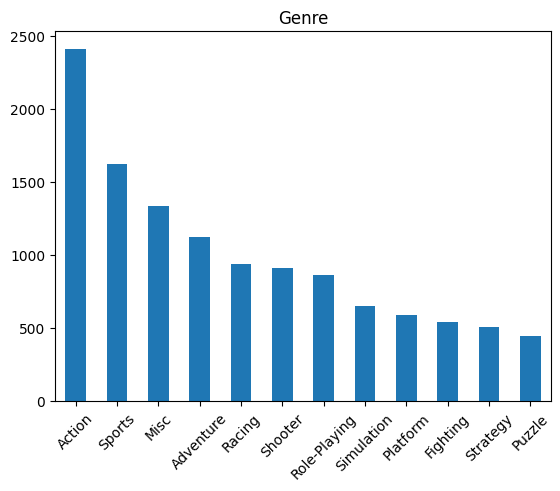

In [90]:
#feature Genre
feature = categorical_features[1]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, rot=45);

Pada tahap baris kode ini ditujukan mendeskripsikan jumlah sampel dan persentase kolom kategorik dari `Pubsliher`

                      jumlah sampel  persentase
Electronic Arts                 866         7.3
Activision                      734         6.2
Ubisoft                         719         6.0
THQ                             568         4.8
Namco Bandai Games              566         4.7
...                             ...         ...
Marvel Entertainment              1         0.0
Illusion Softworks                1         0.0
Phantagram                        1         0.0
The Learning Company              1         0.0
UIG Entertainment                 1         0.0

[523 rows x 2 columns]


<Axes: title={'center': 'Publisher (10 Highest)'}>

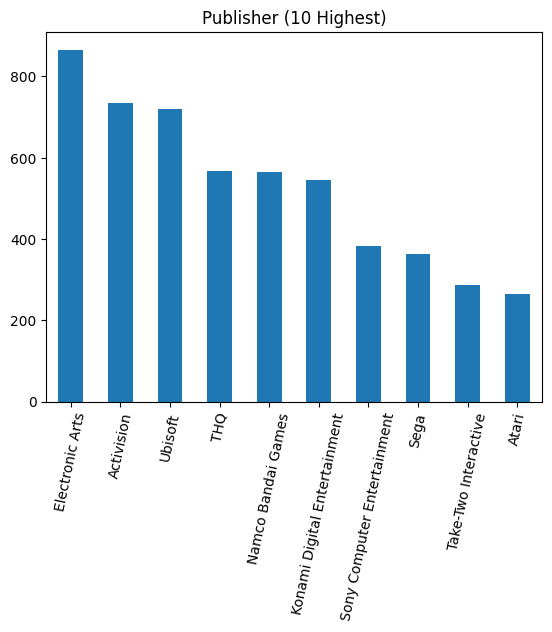

In [91]:
#feature Pubsliher
feature = categorical_features[2]
count = dataset[feature].value_counts()
count_for_plot_highest = dataset[feature].value_counts().head(10)
count_for_plot_lowest = dataset[feature].value_counts().tail(10)
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count_for_plot_highest.plot(kind='bar', title=feature + ' ' + '(10 Highest)', rot=78)

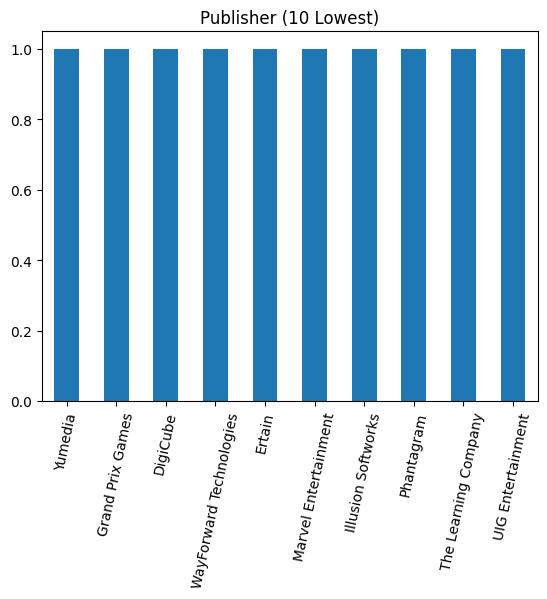

In [92]:
count_for_plot_lowest.plot(kind='bar', title=feature + ' ' + '(10 Lowest)', rot=78);

Pada tahap baris kode ini ditujukan mendeskripsikan jumlah sampel dan persentase kolom kategorik dari `Platform`

      jumlah sampel  persentase
DS             1754        14.7
PS2            1466        12.3
Wii            1035         8.7
X360            928         7.8
PSP             906         7.6
PC              821         6.9
PS3             814         6.8
XB              735         6.2
PS              730         6.1
GBA             681         5.7
GC              479         4.0
3DS             344         2.9
PSV             343         2.9
PS4             222         1.9
N64             221         1.9
XOne            160         1.3
WiiU            108         0.9
SAT              69         0.6
SNES             44         0.4
DC               22         0.2
2600             13         0.1
GEN              10         0.1
NG                6         0.1
SCD               4         0.0
GB                4         0.0
3DO               3         0.0
PCFX              1         0.0
NES               1         0.0
WS                1         0.0
TG16              1         0.0


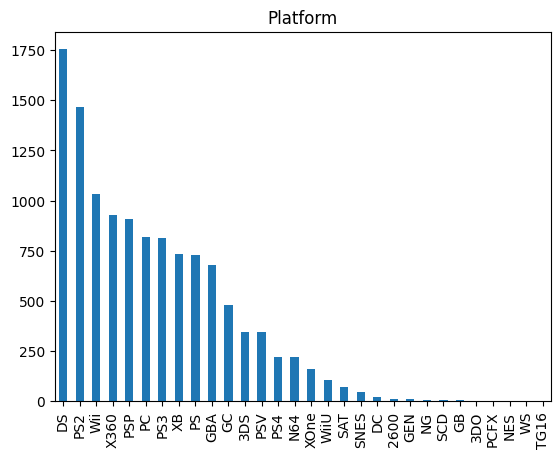

In [93]:
#feature Platform
feature = categorical_features[3]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

######Numerical Features

Pada tahap baris kode ini ditujukan visualisai persebaran dari kolom`'Rank', 'Year', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'`

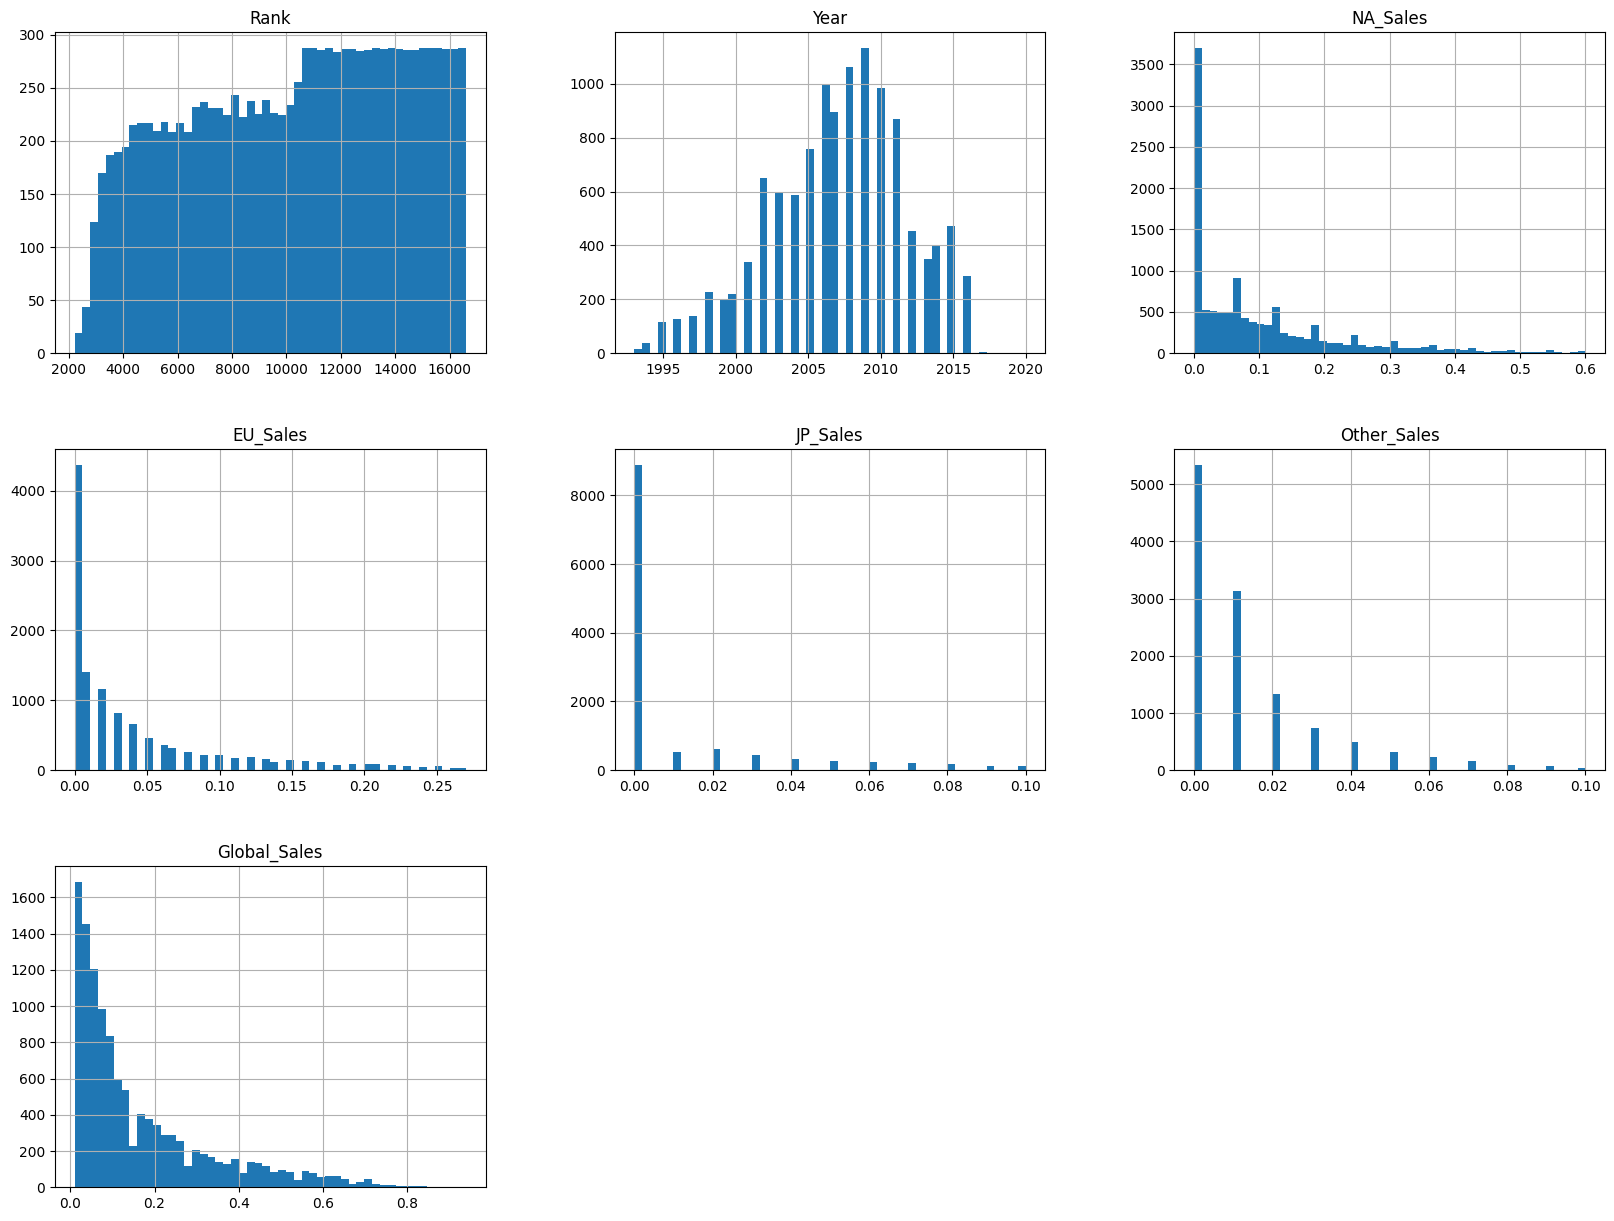

In [94]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

###Multivariate Analysis
Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 2 atau lebih jenis variabel / kolom

######Categorical Features

Visualisasi untuk rata-rata kolom `Year` terhadap kolom kategorik `'Genre'`, `'Publisher'`, dan `'Platform'`

['Genre', 'Platform', 'Publisher']

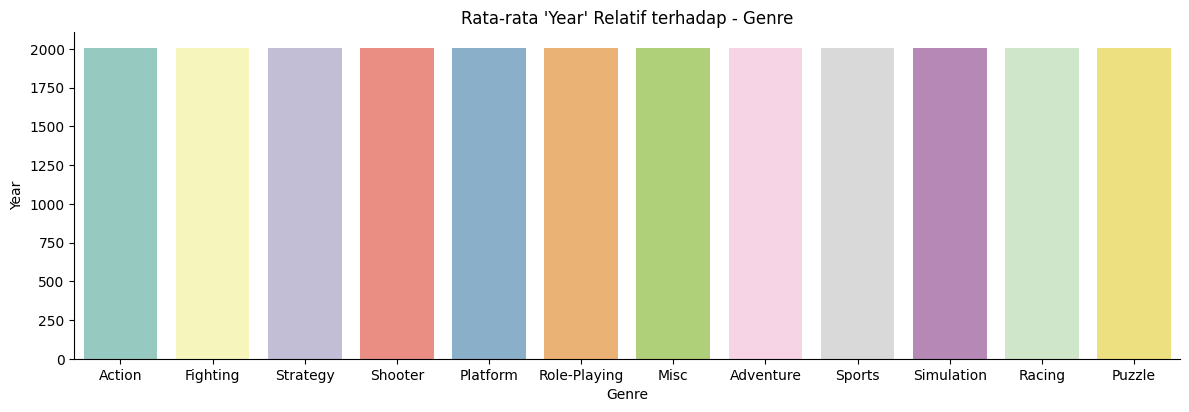

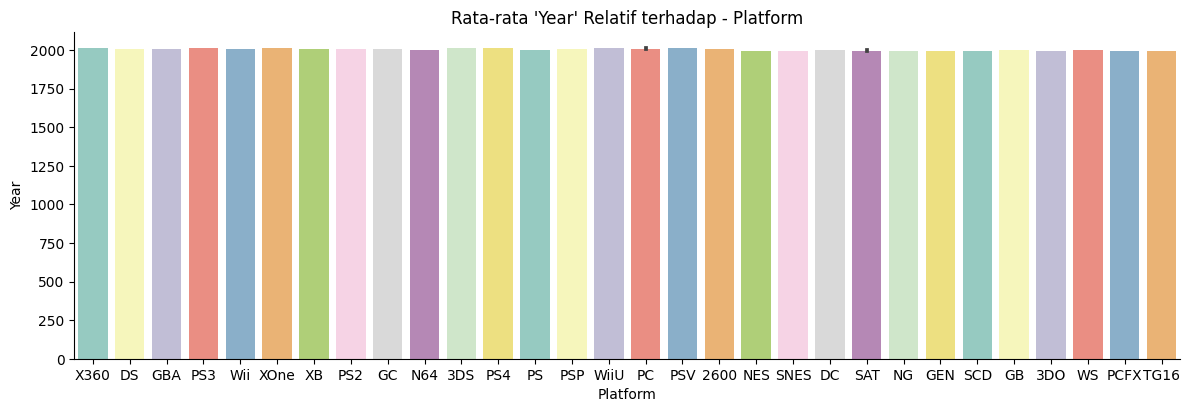

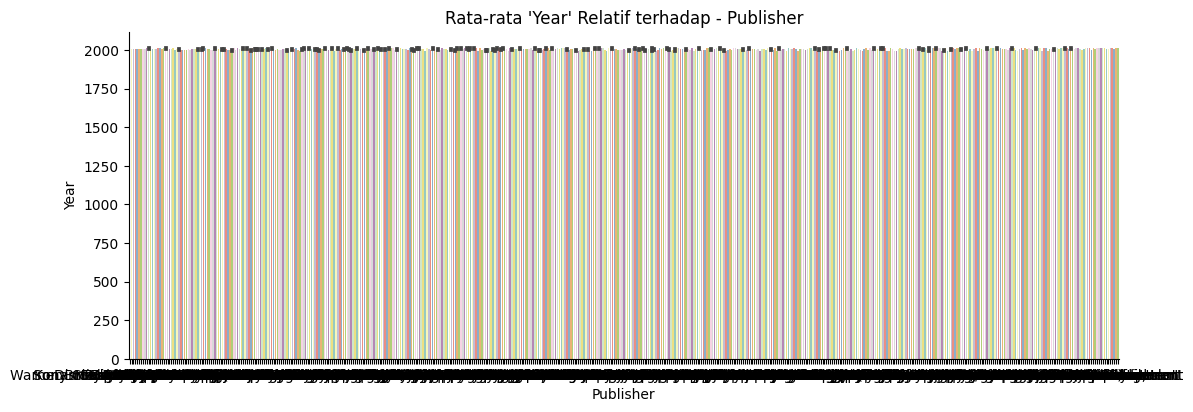

In [95]:
cat_features = dataset.select_dtypes(include='object').columns.difference(['Name']).to_list()

for col in cat_features:
  sns.catplot(x=col, y="Year", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'Year' Relatif terhadap - {}".format(col))

cat_features

Visualisasi untuk rata-rata kolom `EU_Sales` terhadap kolom kategorik `'Genre'`, `'Publisher'`, dan `'Platform'`

['Genre', 'Platform', 'Publisher']

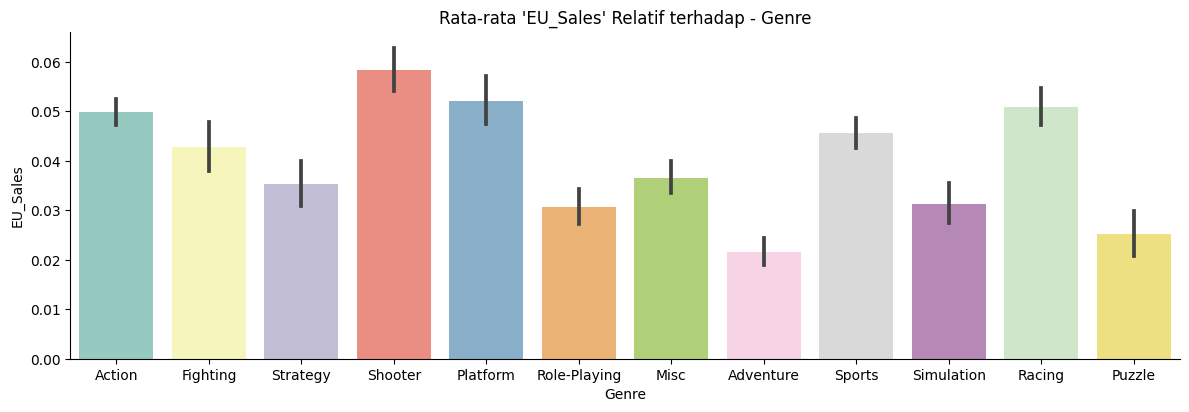

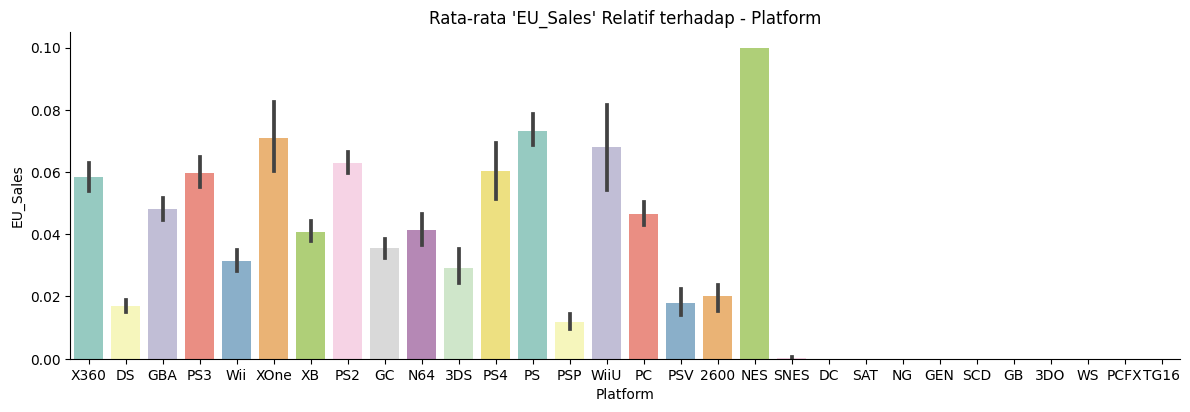

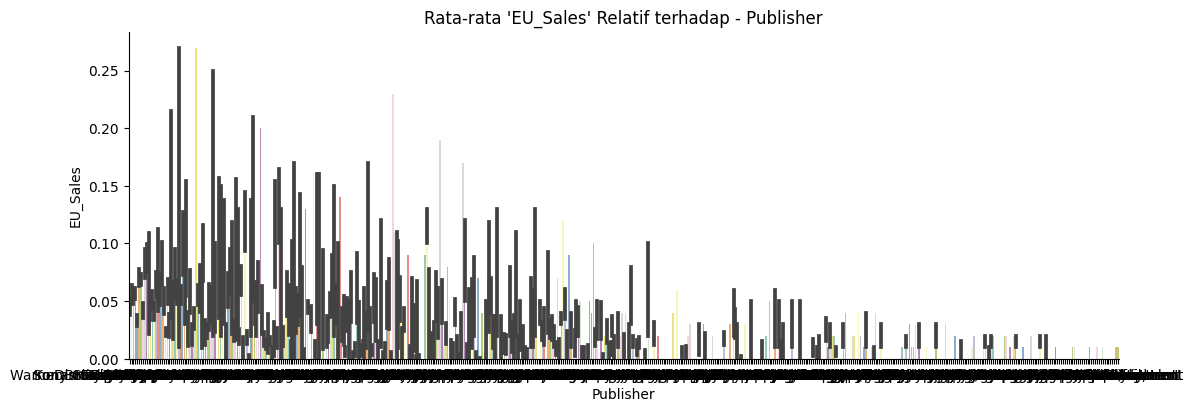

In [96]:
cat_features = dataset.select_dtypes(include='object').columns.difference(['Name']).to_list()

for col in cat_features:
  sns.catplot(x=col, y="EU_Sales", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'EU_Sales' Relatif terhadap - {}".format(col))

cat_features

Visualisasi untuk rata-rata kolom `JP_Sales` terhadap kolom kategorik `'Genre'`, `'Publisher'`, dan `'Platform'`

['Genre', 'Platform', 'Publisher']

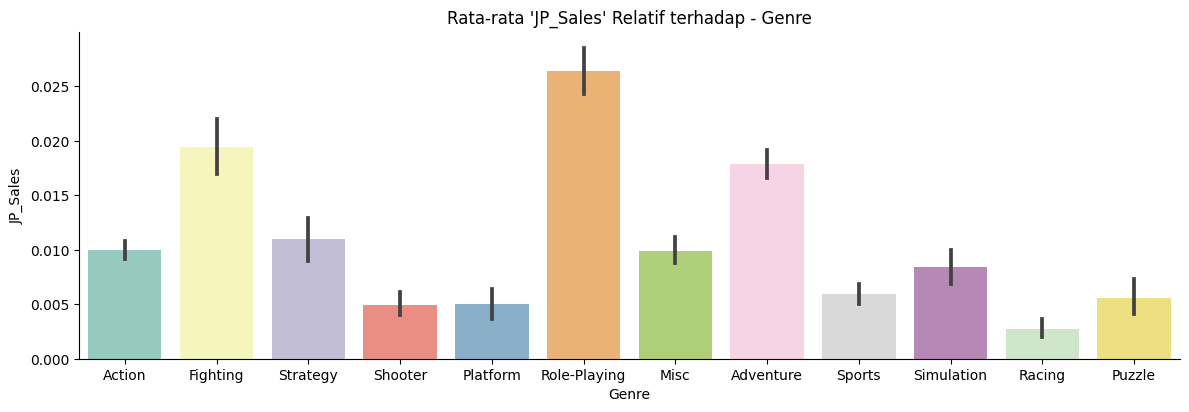

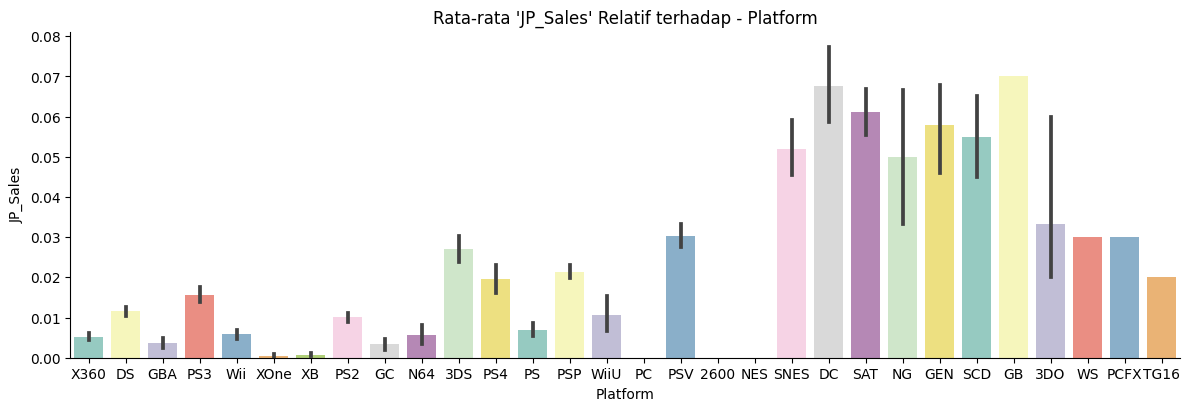

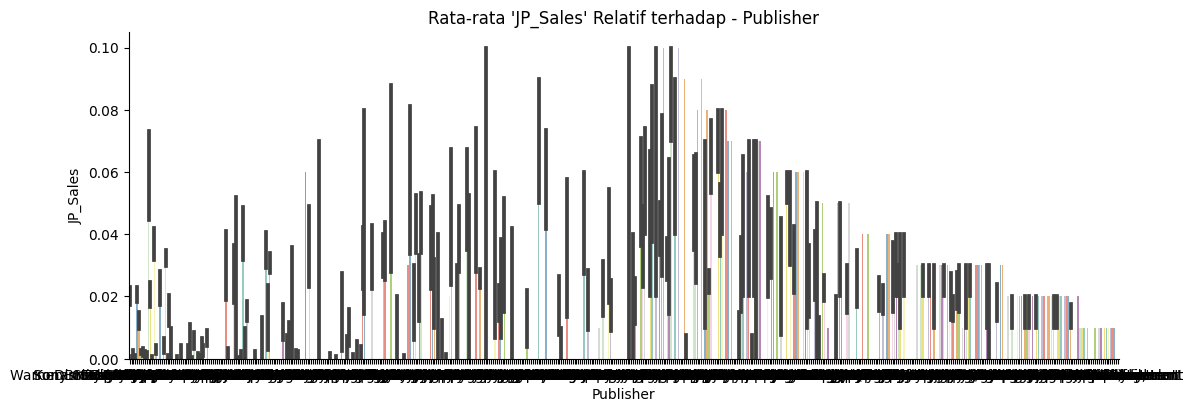

In [97]:
cat_features = dataset.select_dtypes(include='object').columns.difference(['Name']).to_list()

for col in cat_features:
  sns.catplot(x=col, y="JP_Sales", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'JP_Sales' Relatif terhadap - {}".format(col))

cat_features

Visualisasi untuk rata-rata kolom `Other_Sales` terhadap kolom kategorik `'Genre'`, `'Publisher'`, dan `'Platform'`

['Genre', 'Platform', 'Publisher']

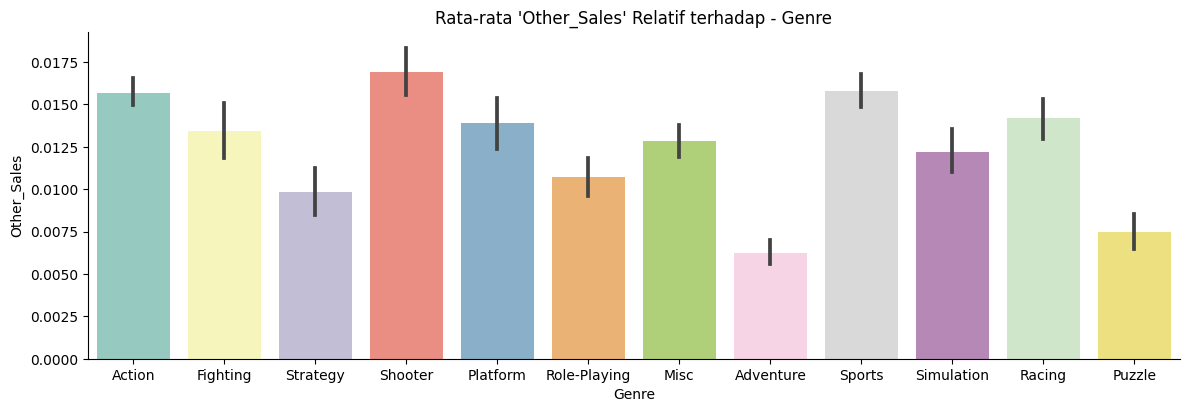

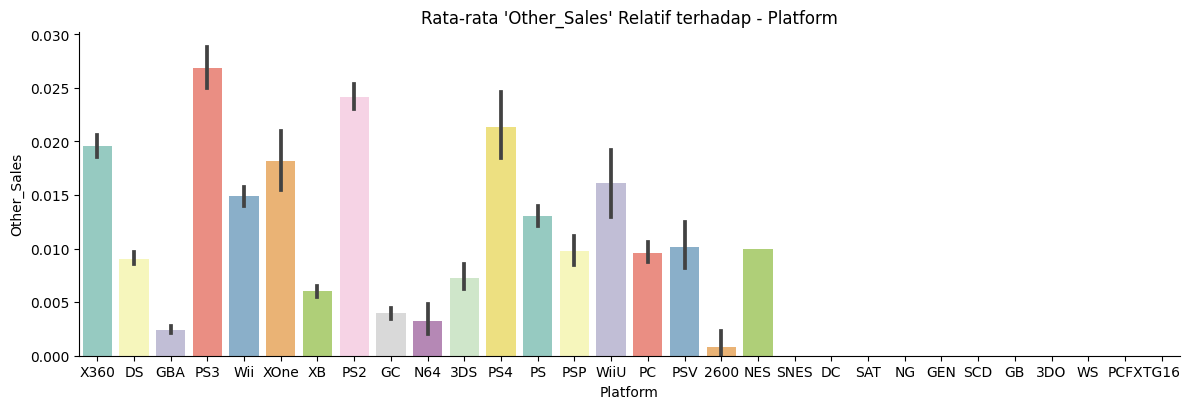

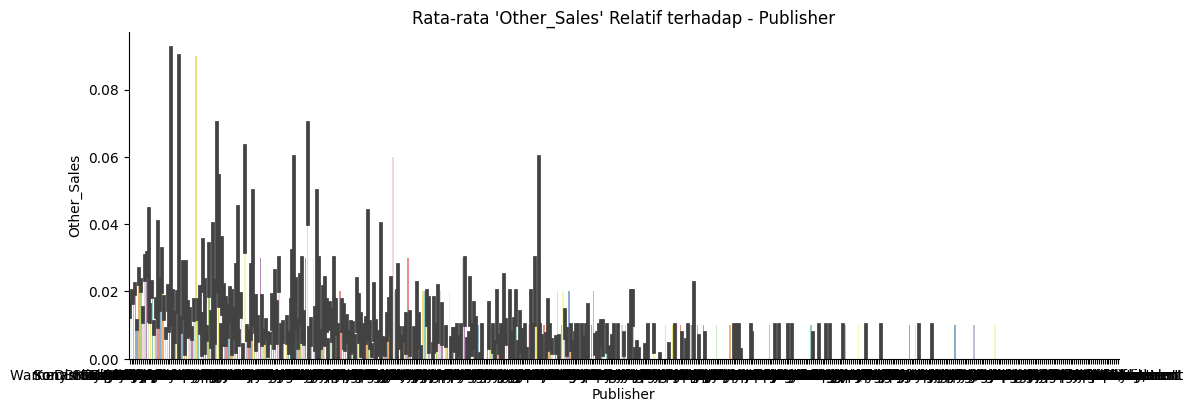

In [98]:
cat_features = dataset.select_dtypes(include='object').columns.difference(['Name']).to_list()

for col in cat_features:
  sns.catplot(x=col, y="Other_Sales", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'Other_Sales' Relatif terhadap - {}".format(col))

cat_features

######Numerical Features

Visualisasi keterkaitan data untuk setiap kolom numerik dengan kolom numerik lainnya. Disini juga untuk melihat korelasi dengan kolom target

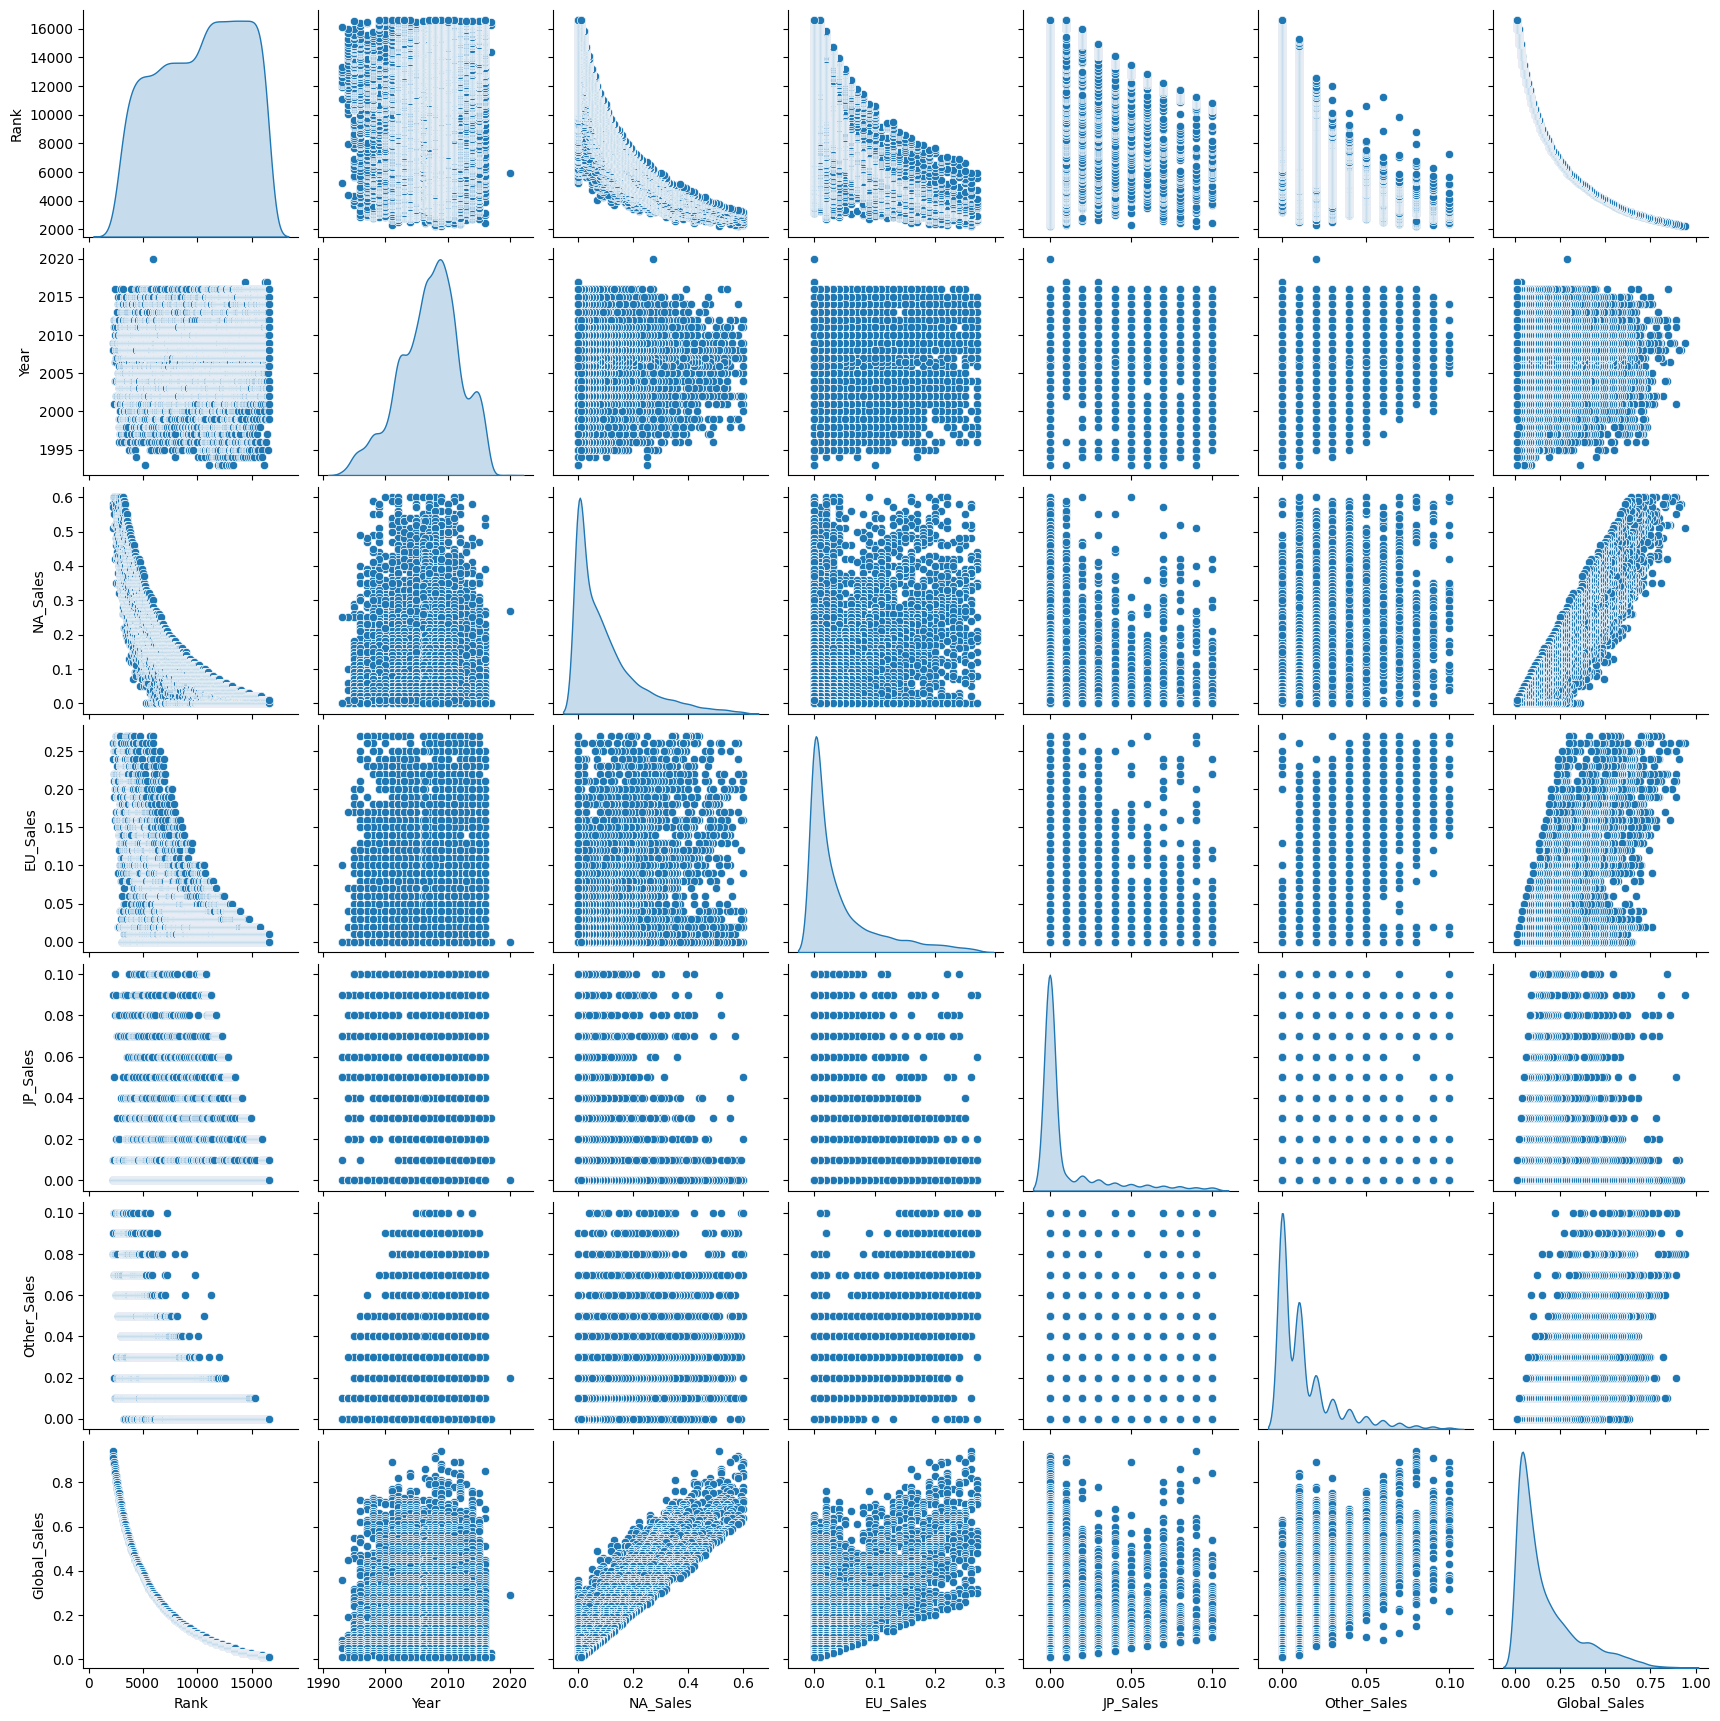

In [99]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(dataset, diag_kind = 'kde')

Visualisasi matriks korelasi data untuk setiap kolom numerik dengan kolom numerik lainnya

<ipython-input-100-18efc63f0a9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

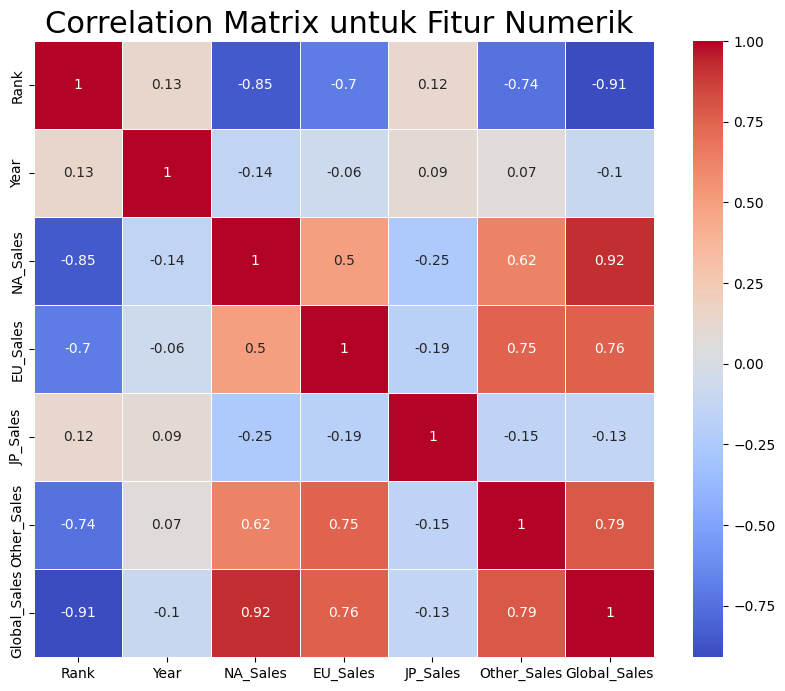

In [100]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=22)

###Drop Column
Tahap untuk melakukan penghilangan kolom yang tidak diperlukan sesuai analisis masalah dan tujuan penelitian.

Hasil: Penghilangan kolom `Rank` ditujukan untuk mengurangi jumlah kolom berkorelasi sangat jauh secara domain knowledge dari dataset, alasan penghilangan kolom `Rank` karena kolom tersebut merupakan sebuah identifier dari dataset.

In [101]:
dataset.drop(['Rank'], inplace=True, axis=1)

dataset.head()

<ipython-input-101-afa2d976115d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['Rank'], inplace=True, axis=1)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2206,Bayonetta,X360,2009.0,Action,Sega,0.51,0.26,0.09,0.08,0.94
2253,WWE SmackDown vs. Raw 2009,X360,2008.0,Fighting,THQ,0.58,0.26,0.00,0.08,0.92
2278,Tom Clancy's EndWar,X360,2008.0,Strategy,Ubisoft,0.58,0.24,0.01,0.09,0.91
2288,Call of Duty: World at War,DS,2008.0,Shooter,Activision,0.57,0.26,0.00,0.08,0.91
2330,Castlevania: Circle of the Moon,GBA,2001.0,Platform,Konami Digital Entertainment,0.60,0.22,0.05,0.02,0.89


### Encoding Categorical Features
Tahap untuk memberikan alias dalam bentuk numerik kepada kolom yang bersifat kategorikal

Hasil: Kolom kategorikal ada 2 yaitu `Name`, `Genre`, `Publisher`, dan `Platform`. Maka proses yang dilakukan adalah
- melakukan encoding terhdapat kolom tersebut, kecuali kolom `Name` yang hanya sebuah identifier
- memisahkan hasil encode menjadi masing-masing kolom
- menghapus kolom `Name`, `Genre`, `Publisher`, dan `Platform`

In [102]:
from sklearn.preprocessing import OneHotEncoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['Genre'], prefix='country')],axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Publisher'], prefix='gender')],axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Platform'], prefix='gender')],axis=1)
dataset.drop(['Name', 'Genre', 'Publisher', 'Platform'], axis=1, inplace=True)
# dataset.drop(['country','gender','credit_card','active_member','churn'], axis=1, inplace=True)
# dataset.head()
dataset

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,country_Action,country_Adventure,country_Fighting,country_Misc,...,gender_SAT,gender_SCD,gender_SNES,gender_TG16,gender_WS,gender_Wii,gender_WiiU,gender_X360,gender_XB,gender_XOne
2206,2009.0,0.51,0.26,0.09,0.08,0.94,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2253,2008.0,0.58,0.26,0.00,0.08,0.92,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2278,2008.0,0.58,0.24,0.01,0.09,0.91,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2288,2008.0,0.57,0.26,0.00,0.08,0.91,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2330,2001.0,0.60,0.22,0.05,0.02,0.89,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,2002.0,0.01,0.00,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16594,2003.0,0.01,0.00,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16595,2008.0,0.00,0.00,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16596,2010.0,0.00,0.01,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Train Test Split
Tahap untuk membagi dataset menjadi data train dan data test dalam pembagian yang ditentukan

In [103]:
from sklearn.model_selection import train_test_split

X = dataset.drop(["Global_Sales"],axis =1)
y = dataset["Global_Sales"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [104]:
X_train

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,country_Action,country_Adventure,country_Fighting,country_Misc,country_Platform,...,gender_SAT,gender_SCD,gender_SNES,gender_TG16,gender_WS,gender_Wii,gender_WiiU,gender_X360,gender_XB,gender_XOne
10411,2005.0,0.08,0.02,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14461,2015.0,0.00,0.00,0.03,0.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8175,2008.0,0.09,0.07,0.00,0.02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11477,2010.0,0.07,0.00,0.00,0.01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7420,2008.0,0.06,0.14,0.00,0.01,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12424,2006.0,0.03,0.02,0.00,0.01,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9733,1998.0,0.07,0.05,0.00,0.01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4778,2003.0,0.23,0.15,0.00,0.03,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16318,2007.0,0.01,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
y_train

10411    0.11
14461    0.03
8175     0.18
11477    0.08
7420     0.21
         ... 
12424    0.06
9733     0.12
4778     0.40
16318    0.01
7692     0.20
Name: Global_Sales, Length: 10733, dtype: float64

In [106]:
X_test

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,country_Action,country_Adventure,country_Fighting,country_Misc,country_Platform,...,gender_SAT,gender_SCD,gender_SNES,gender_TG16,gender_WS,gender_Wii,gender_WiiU,gender_X360,gender_XB,gender_XOne
5933,2005.0,0.30,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,2003.0,0.49,0.16,0.00,0.02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6928,2012.0,0.09,0.10,0.00,0.05,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,2009.0,0.11,0.01,0.00,0.01,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5859,2006.0,0.15,0.12,0.00,0.04,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,2006.0,0.38,0.01,0.00,0.06,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16342,2007.0,0.00,0.00,0.01,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12137,2006.0,0.00,0.00,0.07,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15050,2006.0,0.02,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
y_test

5933     0.30
3009     0.67
6928     0.24
9740     0.12
5859     0.30
         ... 
4332     0.45
16342    0.01
12137    0.07
15050    0.02
12332    0.06
Name: Global_Sales, Length: 1193, dtype: float64

In [108]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 11926
Total # of sample in train dataset: 10733
Total # of sample in test dataset: 1193


###Standarisasi
Tahap untuk melakukan perubahan skala nilai pada kolom `'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'` sesuai skala yang diinginkan

In [109]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10411,-0.444294,-0.163169,-0.369331,-0.469531,-0.712109
14461,1.651941,-0.833616,-0.708021,0.875884,-0.712109
8175,0.184576,-0.079363,0.477394,-0.469531,0.371552
11477,0.603823,-0.246975,-0.708021,-0.469531,-0.170278
7420,0.184576,-0.330781,1.662809,-0.469531,-0.170278


#Modelling
Tahap ini merupakan proses untuk memodelkan data menggunakan algoritma yang disesuaikan dengan analisis masalah penelitian.
Pada tahap ini menggunakan algoritma regression
- KNN
- Random Forest
- Boosting Algorithm
- Support Vector Regression

###Using KNN

In [110]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting', 'SVR'])

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = y_pred_knn, y_true=y_train)

###Using Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

y_pred_rf = RF.predict(X_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=y_pred_rf, y_true=y_train)

###Using Boosting Algorithm

In [113]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.005, random_state=55)
boosting.fit(X_train, y_train)

y_pred_b = boosting.predict(X_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=y_pred_b, y_true=y_train)

###Using SVR

In [114]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

y_pred_lr = svr.predict(X_train)

models.loc['train_mse','SVR'] = mean_squared_error(y_pred=y_pred_lr, y_true=y_train)

#Evaluation
Tahap ini merupakan proses melihat dan menguji kualitas model yang telah dibuat menggunakan data train dan data test

###Scaling data X_test

In [115]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
X_test.loc[:, numerical_features].head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5933,-0.444294,1.680561,-0.708021,-0.469531,-0.712109
3009,-0.863541,3.272873,2.001499,-0.469531,0.371552
6928,1.023070,-0.079363,0.985429,-0.469531,1.997044
9740,0.394200,0.088249,-0.538676,-0.469531,-0.170278
5859,-0.234671,0.423472,1.324119,-0.469531,1.455214


In [116]:
X_test

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,country_Action,country_Adventure,country_Fighting,country_Misc,country_Platform,...,gender_SAT,gender_SCD,gender_SNES,gender_TG16,gender_WS,gender_Wii,gender_WiiU,gender_X360,gender_XB,gender_XOne
5933,-0.444294,1.680561,-0.708021,-0.469531,-0.712109,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,-0.863541,3.272873,2.001499,-0.469531,0.371552,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6928,1.023070,-0.079363,0.985429,-0.469531,1.997044,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,0.394200,0.088249,-0.538676,-0.469531,-0.170278,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5859,-0.234671,0.423472,1.324119,-0.469531,1.455214,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,-0.234671,2.351008,-0.538676,-0.469531,2.538875,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16342,-0.025047,-0.833616,-0.708021,-0.021059,-0.712109,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12137,-0.234671,-0.833616,-0.708021,2.669771,-0.712109,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15050,-0.234671,-0.666004,-0.708021,-0.469531,-0.712109,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Accuracy Eval / R Squared Score (Using Data Test)

In [117]:
acc = pd.DataFrame(index=['accuracy'])

In [118]:
acc.loc['accuracy', 'knn'] = knn.score(X_test, y_test)
knn.score(X_test, y_test)

0.9726625755516265

In [119]:
acc.loc['accuracy', 'random_forest'] = RF.score(X_test, y_test)
RF.score(X_test, y_test)

0.9968117682907119

In [120]:
acc.loc['accuracy', 'adaboost'] = boosting.score(X_test, y_test)
boosting.score(X_test, y_test)

0.9186622509932593

In [121]:
acc.loc['accuracy', 'SVR'] = svr.score(X_test, y_test)
svr.score(X_test, y_test)

0.8914258829658742

In [122]:
acc

,knn,random_forest,adaboost,SVR
accuracy,0.972663,0.996812,0.918662,0.891426


###Mean Squared Error Eval

In [123]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting', 'SVR'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'SVR':svr}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.000001,0.000001
RF,0.0,0.0
Boosting,0.000002,0.000002
SVR,0.000003,0.000003


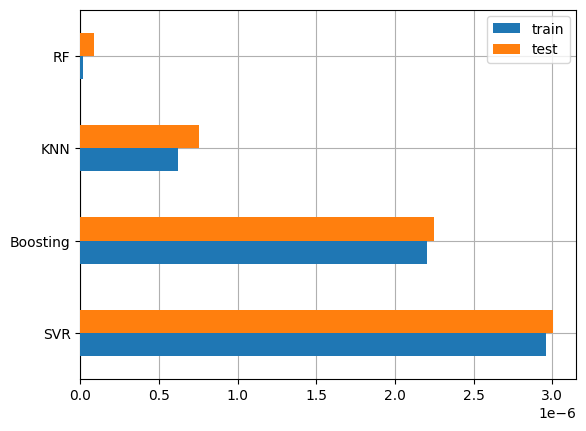

In [124]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

###Predict Using X_test

In [125]:
prediksi = X_test.iloc[:1000].copy()
pred_dict = {'y_true':y_test[:1000]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pred_use_data_test = pd.DataFrame(pred_dict)
pred_use_data_test

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_SVR
5933,0.30,0.3,0.3,0.4,0.3
3009,0.67,0.6,0.7,0.7,0.7
6928,0.24,0.2,0.2,0.3,0.3
9740,0.12,0.1,0.1,0.1,0.1
5859,0.30,0.3,0.3,0.3,0.3
...,...,...,...,...,...
12805,0.06,0.1,0.1,0.0,0.1
15116,0.02,0.0,0.0,0.0,0.1
14169,0.03,0.0,0.0,0.0,0.1
6584,0.26,0.2,0.2,0.3,0.2


###R Squared Score Eval Using Predicted Data

In [126]:
prediksi_r2 = pred_use_data_test

In [127]:
from sklearn.metrics import r2_score

In [128]:
pred_dict_r2 = pd.DataFrame(index=['r2_score'])
for name, model in model_dict.items():
    # pred_dict_r2.loc['r2_score', name] = r2_score(prediksi_r2['prediksi_'+name], prediksi_r2['y_true'])
    pred_dict_r2.loc['r2_score', name] = r2_score(prediksi_r2['y_true'], prediksi_r2['prediksi_'+name])

pred_dict_r2

,KNN,RF,Boosting,SVR
r2_score,0.941931,0.967273,0.866186,0.891318
